In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import gc

In [2]:
# csv파일을 parquet파일로 변환하기 위한 함수

def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet('./' + save_name + '.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [ ]:
# 파일 형식 변경

csv_to_parquet('C:/Users/knzss/Documents/ds_study/project/ds5-ml-repo-1/data/train.csv', 'train')
csv_to_parquet('C:/Users/knzss/Documents/ds_study/project/ds5-ml-repo-1/data/test.csv', 'test')

In [2]:
# 파일 로드
# test파일은 target이 아에 없으므로 train에서 나눠서 사용

train = pd.read_parquet('./train.parquet')
# test = pd.read_parquet('./test.parquet')

In [4]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [3]:
# 데이터 전처리
# [요일, 시작 지점의 회전제한 유무, 도착지점의 회전제한 유무]
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    print(i, le.classes_)

day_of_week ['금' '목' '수' '월' '일' '토' '화']
start_turn_restricted ['없음' '있음']
end_turn_restricted ['없음' '있음']


In [6]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,1,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,0,제3교래교,33.427749,126.662335,0,52.0
1,TRAIN_0000001,20220728,1,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,1,KAL사거리,33.504811,126.526240,0,30.0
2,TRAIN_0000002,20211010,4,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,0,상창육교,33.280072,126.362147,0,61.0
3,TRAIN_0000003,20220311,0,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,0,서현주택,33.245565,126.566228,0,20.0
4,TRAIN_0000004,20211005,6,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,0,애월입구,33.462677,126.330152,0,38.0


In [4]:
# 주말인지 아닌지 판별을 위한 컬럼 추가
train['weekend']=0
train.loc[train['day_of_week'] == 4,'weekend'] = 1
train.loc[train['day_of_week'] == 5,'weekend'] = 1

In [5]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,weekend
0,TRAIN_0000000,20220623,1,17,1,106,지방도1112호선,0,0,60.0,...,제3교래교,33.427747,126.662612,0,제3교래교,33.427749,126.662335,0,52.0,0
1,TRAIN_0000001,20220728,1,21,2,103,일반국도11호선,0,0,60.0,...,광양사거리,33.500730,126.529107,1,KAL사거리,33.504811,126.526240,0,30.0,0
2,TRAIN_0000002,20211010,4,7,2,103,일반국도16호선,0,0,80.0,...,창고천교,33.279145,126.368598,0,상창육교,33.280072,126.362147,0,61.0,1
3,TRAIN_0000003,20220311,0,13,2,107,태평로,0,0,50.0,...,남양리조트,33.246081,126.567204,0,서현주택,33.245565,126.566228,0,20.0,0
4,TRAIN_0000004,20211005,6,8,2,103,일반국도12호선,0,0,80.0,...,애월샷시,33.462214,126.326551,0,애월입구,33.462677,126.330152,0,38.0,0


In [6]:
# 월 컬럼 추가
train['month']=train['base_date']
train['month'] = train['month'].apply(lambda x: int(str(x)[4:6]))

In [17]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,weekend,month
0,TRAIN_0000000,20220623,1,17,1,106,지방도1112호선,0,0,60.0,...,33.427747,126.662612,0,제3교래교,33.427749,126.662335,0,52.0,0,6
1,TRAIN_0000001,20220728,1,21,2,103,일반국도11호선,0,0,60.0,...,33.500730,126.529107,1,KAL사거리,33.504811,126.526240,0,30.0,0,7
2,TRAIN_0000002,20211010,4,7,2,103,일반국도16호선,0,0,80.0,...,33.279145,126.368598,0,상창육교,33.280072,126.362147,0,61.0,1,10
3,TRAIN_0000003,20220311,0,13,2,107,태평로,0,0,50.0,...,33.246081,126.567204,0,서현주택,33.245565,126.566228,0,20.0,0,3
4,TRAIN_0000004,20211005,6,8,2,103,일반국도12호선,0,0,80.0,...,33.462214,126.326551,0,애월입구,33.462677,126.330152,0,38.0,0,10


In [20]:
# 정리한 데이터프레임 저장

train.to_parquet('./train_pwm.parquet')
print('Done.')

Done.


In [26]:
train = pd.read_parquet('./train_pwm.parquet')
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,weekend,month
0,TRAIN_0000000,20220623,1,17,1,106,지방도1112호선,0,0,60.0,...,33.427747,126.662612,0,제3교래교,33.427749,126.662335,0,52.0,0,6
1,TRAIN_0000001,20220728,1,21,2,103,일반국도11호선,0,0,60.0,...,33.500730,126.529107,1,KAL사거리,33.504811,126.526240,0,30.0,0,7
2,TRAIN_0000002,20211010,4,7,2,103,일반국도16호선,0,0,80.0,...,33.279145,126.368598,0,상창육교,33.280072,126.362147,0,61.0,1,10
3,TRAIN_0000003,20220311,0,13,2,107,태평로,0,0,50.0,...,33.246081,126.567204,0,서현주택,33.245565,126.566228,0,20.0,0,3
4,TRAIN_0000004,20211005,6,8,2,103,일반국도12호선,0,0,80.0,...,33.462214,126.326551,0,애월입구,33.462677,126.330152,0,38.0,0,10


In [32]:
tar_corr = train.corr()[abs(train.corr()) > 0.005]
# tar_corr = train.corr()

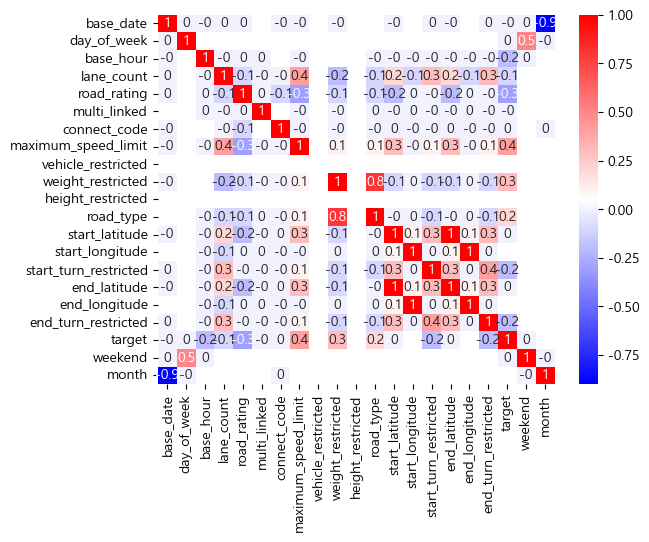

In [35]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

sns.heatmap(data = tar_corr.round(1), annot = True, cmap = 'bwr')
plt.show()

In [33]:
tar_corr.iloc[-3]

base_date               -0.033997
day_of_week              0.006397
base_hour               -0.159407
lane_count              -0.144256
road_rating             -0.261693
multi_linked            -0.008408
connect_code             0.048348
maximum_speed_limit      0.425715
vehicle_restricted            NaN
weight_restricted        0.294092
height_restricted             NaN
road_type                0.200840
start_latitude           0.036280
start_longitude               NaN
start_turn_restricted   -0.156121
end_latitude             0.036139
end_longitude                 NaN
end_turn_restricted     -0.162815
target                   1.000000
weekend                  0.009859
month                         NaN
Name: target, dtype: float64